## Implementing Edge Detection Operators in Python

## Table of Contents
* [Edge Detection Operators](#Edge)
    * [Kirsch Operator](#Kirsch)
    * [Sobel Operator](#Sobel)
* [Python Implementation](#Implementation)
* [Applying the Operators](#Applying)

<a id="Edge"></a>
## Edge Detection Operators

Image edge detection is a simple operation in image processing but is a fundamental step in some other complex operations such as image recognition and scene analysis. There are different operators that are used in detecting edges of images.

In this post, we are going to implement and apply two operators that are widely used for edge detection.
* Kirsch Operator
* Sobel Operator

These 3x3 operators are usually applied to images in spatial domain by convolving in them. 

<a id="Kirsch"></a>
## Kirsch Operator

Consider a 3x3 image region centered at $A_*$. Let the region be as follows:

$$ \begin{bmatrix} 
  A_0 & A_1 & A_2\\
  A_8 & A_* & A_4\\
  A_7 & A_6 & A_5
\end{bmatrix} $$

$S_i = A_i + A_{i+1} + A_{i+2} $ (Modulo $8$)

$T_i = A_{i+3} + A_{i+4} + A_{i+5} + A_{i+6} + A_{i+7} + A_{i+8}$ (Modulo $8$)

So the gradient will be calculated as:

$ G(j,k) = Max_{i=0}^7[|5S_i - 3T_i|]$

In the kirsch operator, the one that gives the maximum value in all directions is selected as the gradient.

<a id="Sobel"></a>
## Sobel Operator

The Sobel operator is applied as follows:

$ \Delta_1 = \begin{bmatrix} 
  -1 & 0 & 1\\
  -2 & 0 & 2\\
  -1 & 0 & 1
\end{bmatrix} $

$ \Delta_2 = \begin{bmatrix} 
  1 & 2 & 1\\
  0 & 0 & 0\\
  -1 & -2 & -1
\end{bmatrix} $

So the edge enhanced one will be calculated as:

$ g(x,y) = \sqrt{\Delta_1^2 + \Delta_2^2} $

<a id="Implementation"></a>
## Python Implementation

Let's first import the common classes.

In [6]:
from CommonClasses.fft import *
from CommonClasses.dct import *
from CommonClasses.walsh import *
from CommonClasses.haar import *
from CommonClasses.utils import *

import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

#import matplotlib.image as img
#import PIL.Image as Image 
from PIL import Image
import math
import cmath

import time

import csv

from numpy import binary_repr

from fractions import gcd

In [7]:
def computeKirsch(imge):
    """Computes and applies Kirsch operator to a given image."""
    N = imge.shape[0]
    result = np.zeros([N, N], dtype=float)
    
    #Copy the first and last rows, first and last columns
    result[0, :] = imge[0, :]
    result[:, 0] = imge[:, 0]
    result[N-1, :] = imge[N-1, :]
    result[:, N-1] = imge[:, N-1]
    
    #Kirsch Operator to the image.
    for i in np.arange(1, N-1):
        for j in np.arange(1, N-1):
            
            #Take the sub image.
            subImge = imge[i-1:i+2, j-1:j+2]
            
            #Number of elements in which Kirsch operator is applied
            n = 8
            
            #Flatten the sub image.
            subImgeFl = np.zeros(n, dtype=int)
            subImgeFl[:3] = subImge[0,:]
            subImgeFl[3] = subImge[1, -1]
            subImgeFl[4:7] = subImge[-1,:][::-1]
            subImgeFl[7] = subImge[1,0]

            #Variable that stores the maximum value
            mx = 1
            for k in np.arange(n):
                S = subImgeFl[k%n]+subImgeFl[(k+1)%n]+subImgeFl[(k+2)%n]
                T = (subImgeFl[(k+3)%n]+subImgeFl[(k+4)%n]+subImgeFl[(k+5)%n]+
                     subImgeFl[(k+6)%n]+subImgeFl[(k+7)%n])
                diff = abs((5*S)-(3*T)) 
                if diff > mx:
                    mx = diff
            result[i, j] = mx
            
    return result

In [8]:
def generateRowColumnSobelGradients():
    """Generates the x-component and y-component of Sobel operators."""
    rowGradient = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    colGradient = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    return rowGradient, colGradient

In [11]:
def computeSobel(imge):
    """Computes and applies Sobel operator to an image."""
    N = imge.shape[0]
    result = np.zeros([N, N], dtype=float)
    
    #Copy the first and last rows, first and last columns
    result[0, :] = imge[0, :]
    result[:, 0] = imge[:, 0]
    result[N-1, :] = imge[N-1, :]
    result[:, N-1] = imge[:, N-1]
    
    #Generate the Row and Column Gradients of Sober.
    rowGradient, colGradient = generateRowColumnSobelGradients()
    
    #Sober Operator to the image.
    for i in np.arange(1, N-1):
        for j in np.arange(1, N-1):
            subImge = imge[i-1:i+2, j-1:j+2]
            rowSum = np.sum(rowGradient * subImge)
            colSum = np.sum(colGradient * subImge)
            result[i, j] = math.sqrt(rowSum**2 + colSum**2)
    
    return result

<a id="Applying"></a>
## Applying The Operators

In [12]:
#Read an image files
imge = Images.generateBlackAndWhiteSquareImage(512)
imgeWoman = Image.open(r'Images/peppers_gray.jpg') # open an image
imgeWoman = imgeWoman.convert(mode='L')

imgeCameraman = Image.open("Images/lena_gray_256.tif") # open an image

#Convert the image file to a matrix
imgeWoman = np.array(imgeWoman)
imgeCameraman = np.array(imgeCameraman)

In [13]:
sobImge = computeSobel(imge)
sobImgeWoman = computeSobel(imgeWoman)
sobImgeCameraman = computeSobel(imgeCameraman)

In [14]:
kirImge = computeKirsch(imge)
kirImgeWoman = computeKirsch(imgeWoman)
kirImgeCameraman = computeKirsch(imgeCameraman)

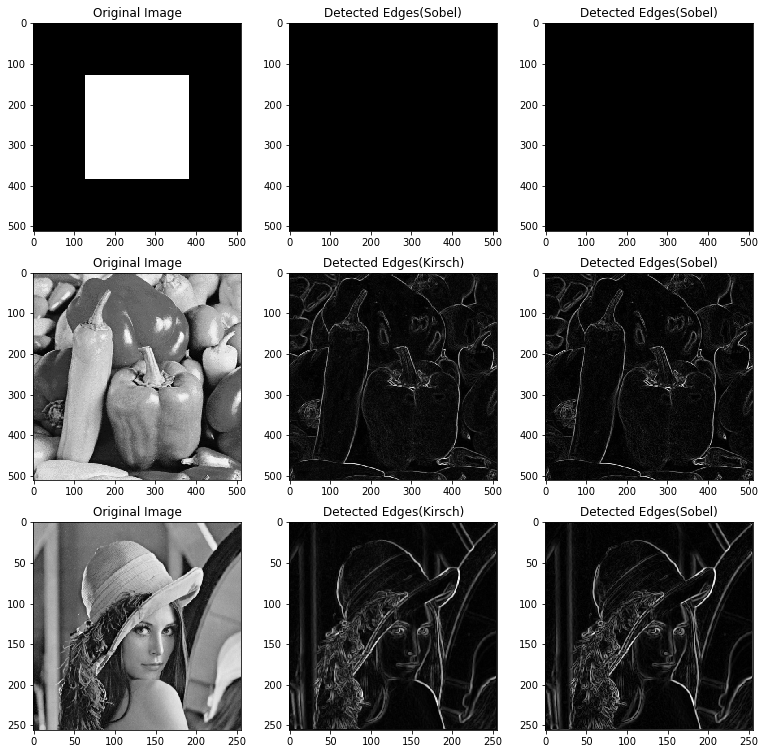

In [15]:
fig, axarr = plt.subplots(3, 3, figsize=[13,13])
axarr[0][0].imshow(imge, cmap=plt.get_cmap('gray'))
axarr[0][0].set_title('Original Image')
axarr[0][1].imshow(kirImge, cmap=plt.get_cmap('gray'))
axarr[0][1].set_title('Detected Edges(Sobel)')
axarr[0][2].imshow(sobImge, cmap=plt.get_cmap('gray'))
axarr[0][2].set_title('Detected Edges(Sobel)')

axarr[1][0].imshow(imgeWoman, cmap=plt.get_cmap('gray'))
axarr[1][0].set_title('Original Image')
axarr[1][1].imshow(kirImgeWoman, cmap=plt.get_cmap('gray'))
axarr[1][1].set_title('Detected Edges(Kirsch)')
axarr[1][2].imshow(sobImgeWoman, cmap=plt.get_cmap('gray'))
axarr[1][2].set_title('Detected Edges(Sobel)')

axarr[2][0].imshow(imgeCameraman, cmap=plt.get_cmap('gray'))
axarr[2][0].set_title('Original Image')
axarr[2][1].imshow(kirImgeCameraman, cmap=plt.get_cmap('gray'))
axarr[2][1].set_title('Detected Edges(Kirsch)')
axarr[2][2].imshow(sobImgeCameraman, cmap=plt.get_cmap('gray'))
axarr[2][2].set_title('Detected Edges(Sobel)')


plt.show()

As can be shown in the above results, the operators are able to detect the edges of the given images.